In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import OLS
from statsmodels.api import stats
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
#Original Data
df_origin=pd.read_excel('125416294_2_中医现状与发展调查_91_88.xlsx')
df_origin

,序号,提交答卷时间,所用时间,来源,来源详情,来自IP,1.您的年龄？,2.您的学历？（包括就读）,3.您是否认可中医？,4.您对中医理论（如阴阳调和、经络、气血等）的看法？,...,Unnamed: 26,9 (安全性欠缺),9 (治疗效果欠佳),9 (见效速度较慢),9 (理论缺乏科学性),9 (传承不足与人才匮乏),9 (新药研发不足),9 (其他：),Unnamed: 34,10.您对中医的现状和发展的其他观点？
0,1,2021/7/31 10:56:06,55秒,微信,NaN,上海,2,3,2,2,...,NaN,0,0,0,1,0,0,0,NaN,(空)
1,2,2021/7/31 11:36:55,70秒,微信,NaN,郑州,2,3,4,4,...,NaN,0,0,0,0,1,1,0,NaN,(空)
2,3,2021/8/2 22:35:02,83秒,微信,NaN,上海,2,3,4,3,...,NaN,0,0,1,0,1,0,0,NaN,(空)
3,4,2021/8/2 22:36:45,271秒,微信,NaN,上海,2,3,3,3,...,NaN,0,0,1,0,0,0,0,NaN,(空)
4,5,2021/8/6 13:58:05,62秒,微信,NaN,上海,2,3,2,3,...,NaN,0,0,1,1,0,0,0,NaN,(空)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,NaN,NaN,纸质,NaN,广州,2,4,4,5,...,NaN,0,0,0,0,1,1,0,NaN,NaN
147,148,NaN,NaN,纸质,NaN,广州,4,2,3,3,...,NaN,0,0,1,0,0,0,0,NaN,NaN
148,149,NaN,NaN,纸质,NaN,广州,3,3,4,4,...,NaN,1,0,0,0,1,0,0,NaN,NaN
149,150,NaN,NaN,纸质,NaN,广州,3,3,2,3,...,NaN,0,1,0,1,0,0,0,NaN,NaN


In [3]:
#Process the data
df=df_origin.drop(df_origin.columns[[0,1,2,3,4,5,12,26,34,35]],axis=1)

columns_name=["年齡","學歷","對中醫的看法","對中醫理論的看法","對中醫療效的看法","是否會選擇中醫",
              "感冒","失眠","糖尿病","腰椎間盤突出","休克","以上皆非",
              "副作用小","治療效果好","見效速度快","理論博大精深","治療費用低","診斷簡便","其他8",
              "安全性欠缺","治療效果欠佳","見效速度較慢","理論缺乏科學性","傳承不足與人才匱乏","新藥研發不足","其他9"]

rename_pair={df.columns[i]:columns_name[i] for i in range(len(columns_name))}
df=df.rename(columns=rename_pair)
df

,年齡,學歷,對中醫的看法,對中醫理論的看法,對中醫療效的看法,是否會選擇中醫,感冒,失眠,糖尿病,腰椎間盤突出,...,治療費用低,診斷簡便,其他8,安全性欠缺,治療效果欠佳,見效速度較慢,理論缺乏科學性,傳承不足與人才匱乏,新藥研發不足,其他9
0,2,3,2,2,3,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,2,3,4,4,5,4,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
2,2,3,4,3,4,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,2,3,3,3,6,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2,3,2,3,4,2,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2,4,4,5,5,3,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0
147,4,2,3,3,4,2,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0
148,3,3,4,4,4,4,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
149,3,3,2,3,3,2,0,0,0,0,...,1,1,0,0,1,0,1,0,0,0


In [4]:
#Data used for regression analysis
df_reg=df.iloc[:,:6]
df_reg

,年齡,學歷,對中醫的看法,對中醫理論的看法,對中醫療效的看法,是否會選擇中醫
0,2,3,2,2,3,1
1,2,3,4,4,5,4
2,2,3,4,3,4,1
3,2,3,3,3,6,1
4,2,3,2,3,4,2
...,...,...,...,...,...,...
146,2,4,4,5,5,3
147,4,2,3,3,4,2
148,3,3,4,4,4,4
149,3,3,2,3,3,2


In [5]:
def responseVSAgeEdu(y,isInteract=False, isPlot=False, isStaircase=False):
    
    '''
    y (string): The name of response variables. One of ['對中醫的看法', '對中醫理論的看法', '對中醫療效的看法', '是否會選擇中醫']
    isInteract (bool): Whether include the interaction term in the regression process
    isPlot (bool): Whether plot and save the plots of the regression.
    isStaircase (bool): Whether use staircase dummy encoding.
      Remark: staircase dummy variable encoding is equivalent to normal dummy variable, 
              but concentrate more on the change of step of ordinal independent variables.
              Here Age 年齡 and Education 學歷 are both ordinal.
    '''
    
    #Fit the model
    df=df_reg[df_reg[y]<=5].reset_index()
    if isInteract:
        model=ols(y+' ~ C(年齡) + C(學歷) + C(年齡)*C(學歷)', data=df).fit()
    else:
        model=ols(y+' ~ C(年齡) + C(學歷)', data=df).fit()

    if isPlot:
        n=df.shape[0]
        #Plot the result
        M=np.zeros([5,5])
        N=np.zeros([4,5])
        s=np.zeros(n)
        t=np.zeros(n)
        for i in range(n):
            M[df['年齡'][i]-1,df[y][i]-1]+=1
            N[df['學歷'][i]-1,df[y][i]-1]+=1
        for i in range(n):
            s[i]=M[df['年齡'][i]-1,df[y][i]-1]
            t[i]=N[df['學歷'][i]-1,df[y][i]-1]

        fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5), sharey=True, dpi=120)
        ax1.set_xlabel('年齡')
        ax1.set_ylabel(y)
        valid=np.array(df[y])<=5
        ax1.scatter(df['年齡'][valid],df[y][valid],s=s[valid]*2)
   
        ax2.set_xlabel('學歷')
        ax2.scatter(df['學歷'][valid],df[y][valid],s=t[valid]*2)


        isplot=[[100,100]]
        iiplot=[[100,100]]
        for i in range(n):
            if np.sum(df['年齡'][i]==np.array(isplot)[:,0])==0 or np.sum(df[y][i]==np.array(isplot)[df['年齡'][i]==np.array(isplot)[:,0],1])==0:
                ax1.text(df['年齡'][i]+.05,df[y][i],int(s[i]))
                isplot=isplot+[[df['年齡'][i],df[y][i]]]
            if np.sum(df['學歷'][i]==np.array(iiplot)[:,0])==0 or np.sum(df[y][i]==np.array(iiplot)[df['學歷'][i]==np.array(iiplot)[:,0],1])==0:
                ax2.text(df['學歷'][i]+.05,df[y][i],int(t[i]))
                iiplot=iiplot+[[df['學歷'][i],df[y][i]]]
        
        plt.savefig('images/'+y+'_origin.png')
   
        intercept=model.params[0]
        age_coef=[0]+model.params[1:5].tolist()
        edu_coef=[0]+model.params[5:8].tolist()
        ageedu_coef=np.zeros((5,4)) 
        if isInteract:
           for edu in range(1,4):
               for age in range(1,5):
                   ageedu_coef[age,edu]=model.params[8+4*(edu-1)+age-1]
            
        x_age=np.arange(1,6)
        for edu in range(4):
            y_age=intercept+age_coef+edu_coef[edu]+ageedu_coef[:,edu]
            ax1.plot(x_age,y_age,color='#00{}00'.format(['ff','cc','99','66'][edu]),label='學歷{}'.format(edu+1))
        ax1.legend()
        x_edu=np.arange(1,5)
        for age in range(5):
            y_edu=intercept+age_coef[age]+edu_coef+ageedu_coef[age,:]
            ax2.plot(x_edu,y_edu,color='#0000{}'.format(['ff','cc','99','66','33'][age]),label='年齡{}'.format(age+1))
        ax2.legend()

        plt.savefig('images/'+y+'.png')

    if isStaircase:
        age_dummy=np.zeros((n,4))
        edu_dummy=np.zeros((n,3))
        for i in range(n):
            age_dummy[i,:(df['年齡'][i]-1)]=1
            edu_dummy[i,:(df['學歷'][i]-1)]=1
        indept=np.concatenate((np.ones((n,1)),age_dummy,edu_dummy),axis=1)
        X=pd.DataFrame(indept,columns=['intercept','年齡2','年齡3','年齡4','年齡5','學歷2','學歷3','學歷4'])
        model=OLS(df[y],X).fit()
    
    return model

### 對各個因變量:
<ol>
    <li>採用F-test確定回歸模型是否包括交互項(interaction term)</li>
    <li>展示並保存回歸圖像</li>
    <li>展示模型細節</li>
</ol>
本次研究選區置信水平(confidence level) 90%.

#### 1.對中醫的看法

In [6]:
model=responseVSAgeEdu('對中醫的看法',isInteract=True)
stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(年齡),4.0,15.439593,3.859898,4.804538,0.001180
C(學歷),3.0,5.364148,1.788049,2.225642,0.088059
C(年齡):C(學歷),12.0,12.820215,1.068351,1.329811,0.208695
Residual,135.0,108.457106,0.803386,NaN,NaN


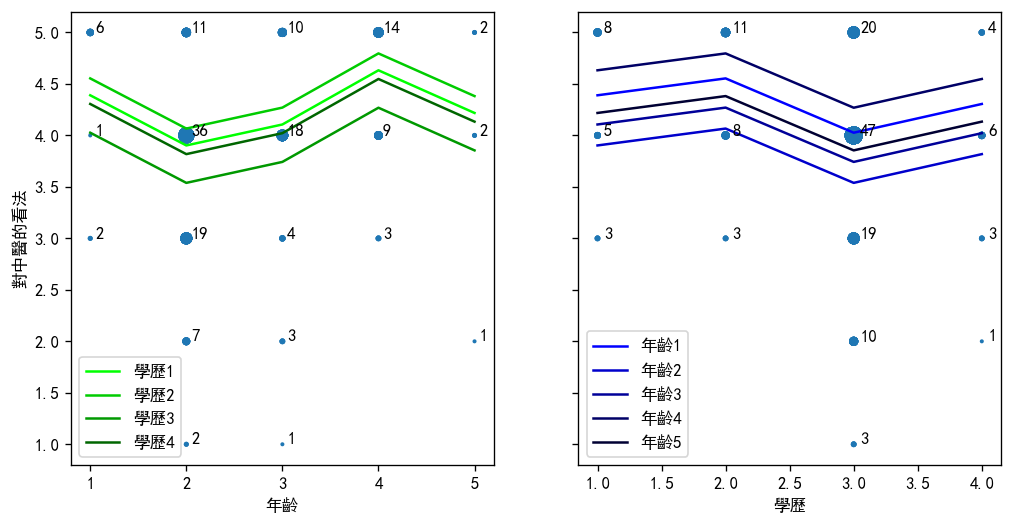

In [7]:
#We don't include the interaction term. We then use staircase dummy
model=responseVSAgeEdu('對中醫的看法',isPlot=True,isInteract=False,isStaircase=True)

In [8]:
model.summary(alpha=0.1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 對中醫的看法   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     3.556
Date:                Tue, 12 Sep 2023   Prob (F-statistic):            0.00148
Time:                        16:42:24   Log-Likelihood:                -196.60
No. Observations:                 151   AIC:                             409.2
Df Residuals:                     143   BIC:                             433.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------
intercept      4.3898      0.323     13.596      0.000       3.855       4.924
年齡2           -0.4872      0.386     -1.264      0.208      -1.126       0.151
年齡3            0.2036      0.190      1.073      0.285      -0.111       0.518
年齡4            0.5263      0.236      2.230      0.027       0.135       0.917
年齡5           -0.4144      0.454     -0.912      0.363      -1.166       0.338
學歷2            0.1639      0.320      0.512      0.609      -0.366       0.694
學歷3           -0.5274      0.225     -2.347      0.020      -0.900      -0.155
學歷4            0.2792      0.262      1.064      0.289      -0.155       0.713
==============================================================================
Omnibus:                       15.580   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.357
Skew:                          -0.816   Prob(JB):                     0.000170
Kurtosis:                       3.305   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 2.對中醫理論的看法

In [9]:
model=responseVSAgeEdu('對中醫理論的看法',isInteract=True)
stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(年齡),4.0,16.810374,4.202594,6.993412,0.000040
C(學歷),3.0,4.494620,1.498207,2.493122,0.063006
C(年齡):C(學歷),12.0,10.900092,0.908341,1.511544,0.127968
Residual,128.0,76.919818,0.600936,NaN,NaN


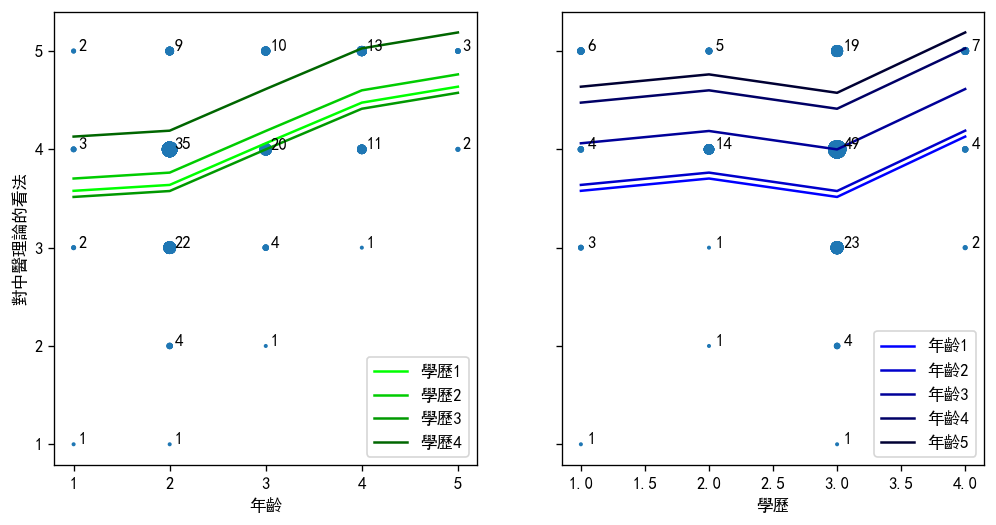

In [10]:
#We don't include the interaction term. We then use staircase dummy
model=responseVSAgeEdu('對中醫理論的看法',isPlot=True,isInteract=False,isStaircase=True)

In [11]:
model.summary(alpha=0.1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               對中醫理論的看法   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     5.032
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           4.26e-05
Time:                        16:42:25   Log-Likelihood:                -164.00
No. Observations:                 144   AIC:                             344.0
Df Residuals:                     136   BIC:                             367.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------
intercept      3.5781      0.295     12.133      0.000       3.090       4.066
年齡2            0.0602      0.343      0.176      0.861      -0.507       0.627
年齡3            0.4235      0.165      2.562      0.011       0.150       0.697
年齡4            0.4134      0.205      2.020      0.045       0.075       0.752
年齡5            0.1621      0.390      0.416      0.678      -0.484       0.808
學歷2            0.1252      0.284      0.440      0.660      -0.346       0.596
學歷3           -0.1873      0.197     -0.951      0.343      -0.513       0.139
學歷4            0.6138      0.231      2.657      0.009       0.231       0.996
==============================================================================
Omnibus:                       15.527   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.231
Skew:                          -0.700   Prob(JB):                     0.000110
Kurtosis:                       4.038   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 3.對中醫療效的看法

In [12]:
model=responseVSAgeEdu('對中醫療效的看法',isInteract=True)
stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(年齡),4.0,5.878293,1.469573,1.556694,0.190309
C(學歷),3.0,7.158380,2.386127,2.527584,0.060637
C(年齡):C(學歷),12.0,8.803204,0.733600,0.777090,0.672879
Residual,120.0,113.284167,0.944035,NaN,NaN


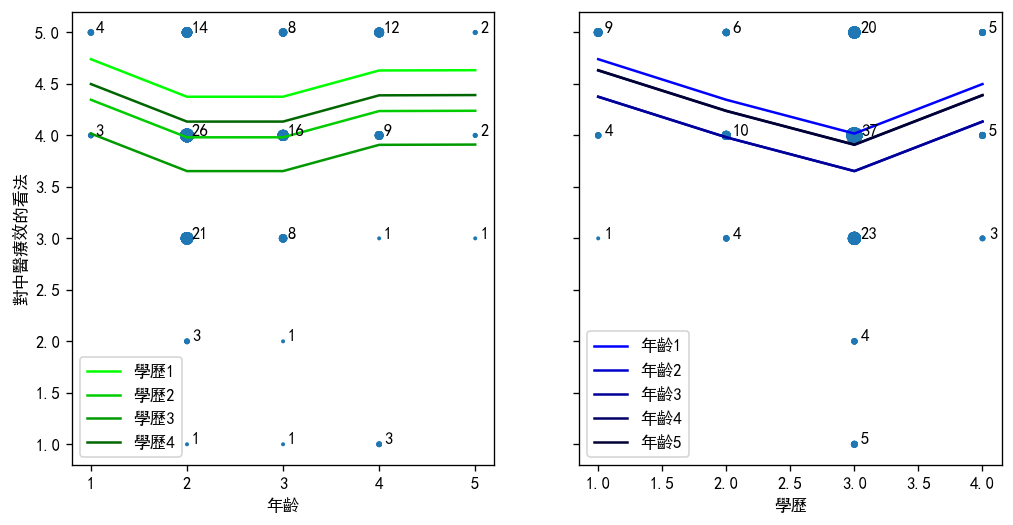

In [13]:
#We don't include the interaction term. We then use staircase dummy
model=responseVSAgeEdu('對中醫療效的看法',isPlot=True,isInteract=False,isStaircase=True)

In [14]:
model.summary(alpha=0.1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               對中醫療效的看法   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     2.028
Date:                Tue, 12 Sep 2023   Prob (F-statistic):             0.0563
Time:                        16:42:26   Log-Likelihood:                -183.05
No. Observations:                 136   AIC:                             382.1
Df Residuals:                     128   BIC:                             405.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------
intercept      4.7404      0.391     12.110      0.000       4.092       5.389
年齡2           -0.3647      0.435     -0.839      0.403      -1.085       0.356
年齡3            0.0002      0.207      0.001      0.999      -0.343       0.343
年齡4            0.2550      0.253      1.006      0.316      -0.165       0.675
年齡5            0.0026      0.478      0.005      0.996      -0.789       0.794
學歷2           -0.3942      0.347     -1.137      0.258      -0.969       0.180
學歷3           -0.3282      0.249     -1.319      0.189      -0.740       0.084
學歷4            0.4809      0.286      1.681      0.095       0.007       0.955
==============================================================================
Omnibus:                       20.883   Durbin-Watson:                   2.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.090
Skew:                          -0.905   Prob(JB):                     2.16e-06
Kurtosis:                       4.152   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 4.是否會選擇中醫

In [15]:
model=responseVSAgeEdu('是否會選擇中醫',isInteract=True)
stats.anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(年齡),4.0,37.815840,9.453960,8.733427,0.000003
C(學歷),3.0,5.685355,1.895118,1.750682,0.160143
C(年齡):C(學歷),12.0,13.929336,1.160778,1.072309,0.389112
Residual,124.0,134.230357,1.082503,NaN,NaN


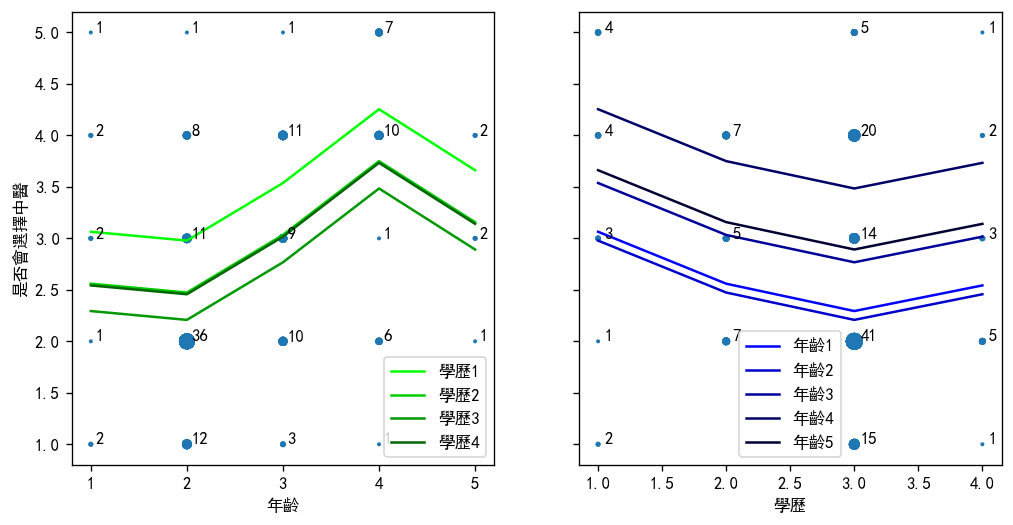

In [16]:
#We don't include the interaction term. We then use staircase dummy
model=responseVSAgeEdu('是否會選擇中醫',isPlot=True,isInteract=False,isStaircase=True)

In [17]:
model.summary(alpha=0.1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                是否會選擇中醫   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     5.629
Date:                Tue, 12 Sep 2023   Prob (F-statistic):           1.06e-05
Time:                        16:42:27   Log-Likelihood:                -201.45
No. Observations:                 140   AIC:                             418.9
Df Residuals:                     132   BIC:                             442.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------
intercept      3.0641      0.399      7.676      0.000       2.403       3.725
年齡2           -0.0858      0.466     -0.184      0.854      -0.857       0.686
年齡3            0.5594      0.225      2.485      0.014       0.186       0.932
年齡4            0.7169      0.278      2.577      0.011       0.256       1.178
年齡5           -0.5925      0.525     -1.130      0.261      -1.461       0.276
學歷2           -0.5044      0.390     -1.295      0.198      -1.150       0.141
學歷3           -0.2657      0.279     -0.953      0.342      -0.728       0.196
學歷4            0.2490      0.323      0.770      0.443      -0.287       0.785
==============================================================================
Omnibus:                        0.693   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.707   Jarque-Bera (JB):                0.795
Skew:                           0.068   Prob(JB):                        0.672
Kurtosis:                       2.657   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 您覺得中醫對一下哪些病症療效較好？

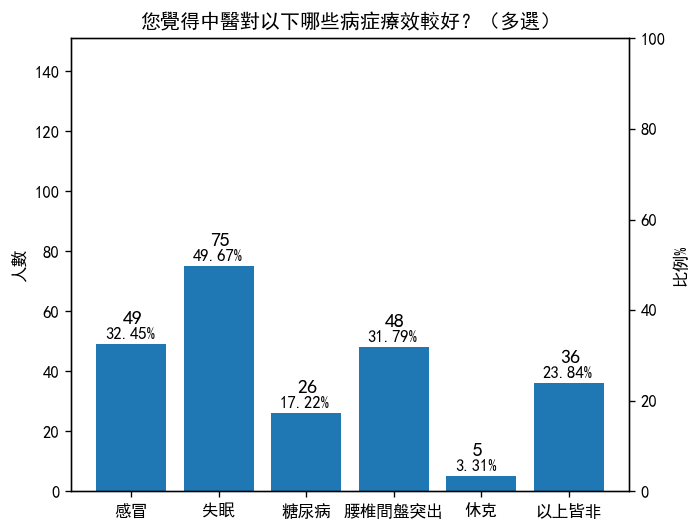

In [18]:
dfq7=df[['感冒','失眠','糖尿病','腰椎間盤突出','休克','以上皆非']]
s=np.sum(dfq7)
fig,ax1=plt.subplots(1,1, figsize=(6,5), sharex=True, dpi=120)

ax1.set_ylim(0,151)
ax1.set_ylabel('人數')
ax2=plt.bar(['感冒','失眠','糖尿病','腰椎間盤突出','休克','以上皆非'],s)

rate=np.sum(dfq7)/dfq7.shape[0]
for i in range(dfq7.shape[1]):
    plt.text(i-.1, s[i]+7, s[i],size=12)
    plt.text(i-.3, s[i]+2, str(np.round(rate[i]*100,2))+'%',size=10)
ax2 = ax1.twinx()
ax2.set_ylim(0,100)
ax2.set_ylabel('比例%')
plt.title('您覺得中醫對以下哪些病症療效較好？（多選）')
plt.savefig("images/病症療效.png")

### 您覺得中醫最大的優勢在於？

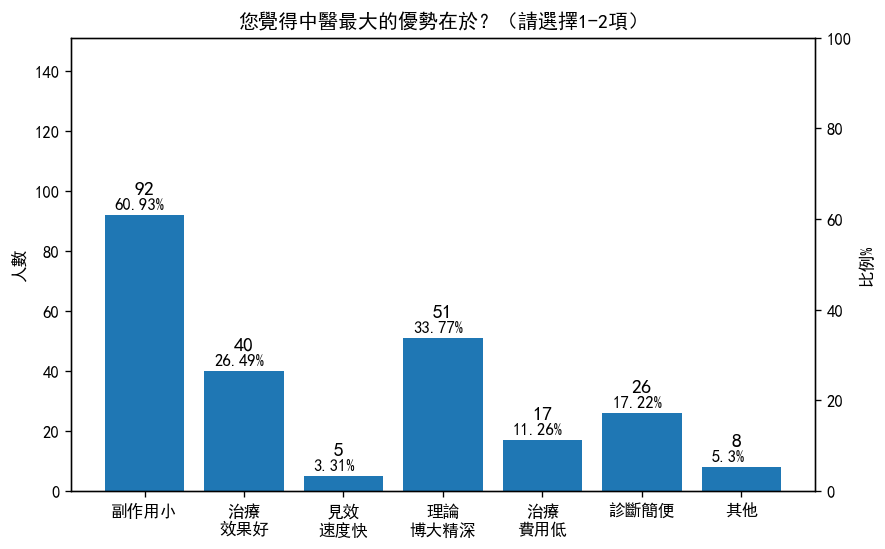

In [19]:
dfq7=df[['副作用小','治療效果好','見效速度快','理論博大精深','治療費用低','診斷簡便','其他8']]
s=np.sum(dfq7)
fig,ax1=plt.subplots(1,1, figsize=(8,5), sharex=True, dpi=120)

ax1.set_ylim(0,151)
ax1.set_ylabel('人數')
ax2=plt.bar(['副作用小','治療\n效果好','見效\n速度快','理論\n博大精深','治療\n費用低','診斷簡便','其他'],s)
rate=np.sum(dfq7)/dfq7.shape[0]
for i in range(dfq7.shape[1]):
    plt.text(i-.1, s[i]+7, s[i],size=12)
    plt.text(i-.3, s[i]+2, str(np.round(rate[i]*100,2))+'%',size=10)
ax2 = ax1.twinx()
ax2.set_ylim(0,100)
ax2.set_ylabel('比例%')
plt.title('您覺得中醫最大的優勢在於？（請選擇1-2項）')
plt.savefig("images/中醫優勢.png")

### 您覺得中醫最大的劣勢在於？

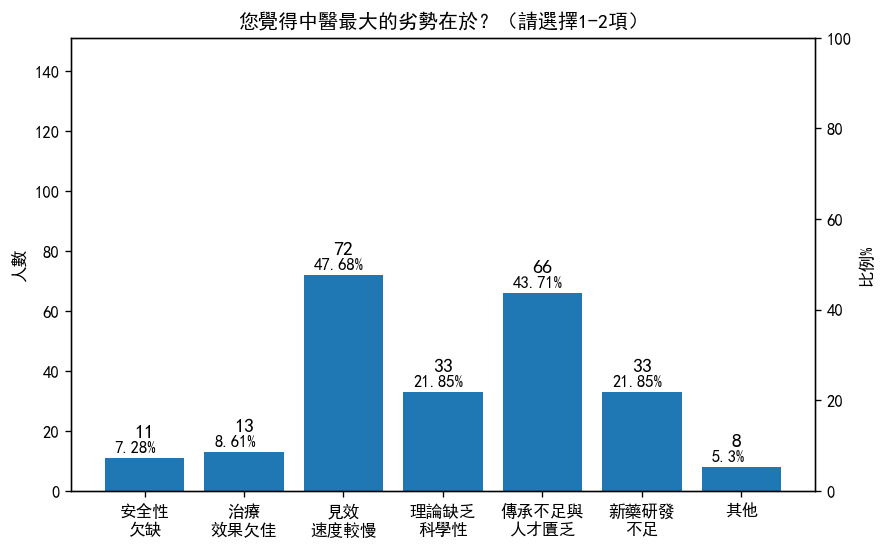

In [20]:
dfq7=df[['安全性欠缺','治療效果欠佳','見效速度較慢','理論缺乏科學性','傳承不足與人才匱乏','新藥研發不足','其他9']]
s=np.sum(dfq7)
fig,ax1=plt.subplots(1,1, figsize=(8,5), sharex=True, dpi=120)

ax1.set_ylim(0,151)
ax1.set_ylabel('人數')
ax2=plt.bar(['安全性\n欠缺','治療\n效果欠佳','見效\n速度較慢','理論缺乏\n科學性','傳承不足與\n人才匱乏','新藥研發\n不足','其他'],s)
rate=np.sum(dfq7)/dfq7.shape[0]
for i in range(dfq7.shape[1]):
    plt.text(i-.1, s[i]+7, s[i],size=12)
    plt.text(i-.3, s[i]+2, str(np.round(rate[i]*100,2))+'%',size=10)
ax2 = ax1.twinx()
ax2.set_ylim(0,100)
ax2.set_ylabel('比例%')
plt.title('您覺得中醫最大的劣勢在於？（請選擇1-2項）')
plt.savefig("images/中醫劣勢.png")

In [21]:
def pieChart(y,labels):
    '''
    y (string): name of plot data
    labels (list of string): name of the labels.
    '''
    u,c=np.unique(df[y],return_counts=True)
    fig,ax1=plt.subplots(1,1, figsize=(8,5), sharex=True, dpi=120)
    explode = (0, 0, 0, 0,0,0.1)
    c=c[0:5]
    labels.reverse()
    c=c.tolist()
    c.reverse()

    theme=matplotlib.cm.get_cmap('bwr')
    if len(labels)==5:
        ax1.set_prop_cycle("color",[theme(i/len(c)) for i in range(len(c))])
    else:
        ax1.set_prop_cycle("color",[theme(i/len(c)+.1) for i in range(len(c))])
        
    ax1.pie(c, startangle=90, radius=1800) 
    ax1.axis('equal')
 
    total=sum(c)
    plt.legend(
        loc='upper left',
        labels=['%s, %1.1f%%' % (l,(float(s)/total)*100) for l, s in zip(labels, c)],
        prop={'size': 10},
        bbox_to_anchor=(0.1, 1),
        bbox_transform=fig.transFigure
    )

    plt.savefig('images/'+y+'_pie.png')

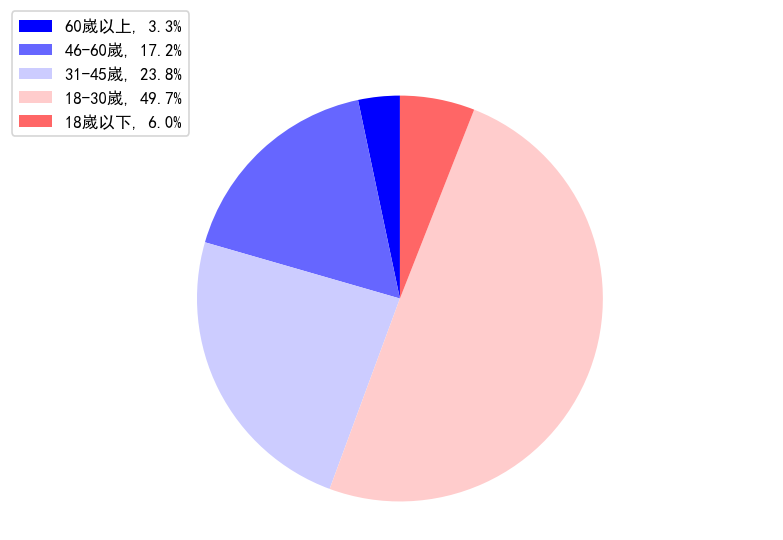

In [22]:
pieChart("年齡",["18嵗以下","18-30嵗","31-45嵗","46-60嵗","60嵗以上"])

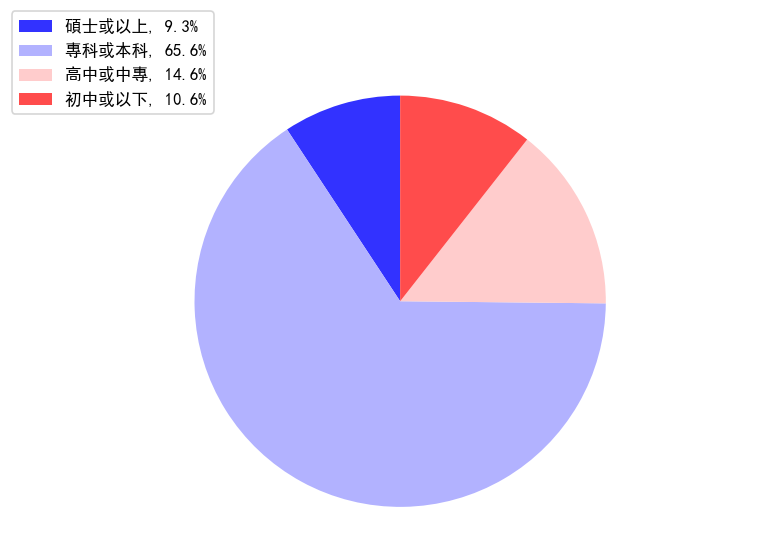

In [23]:
pieChart("學歷",["初中或以下","高中或中專","專科或本科","碩士或以上"])

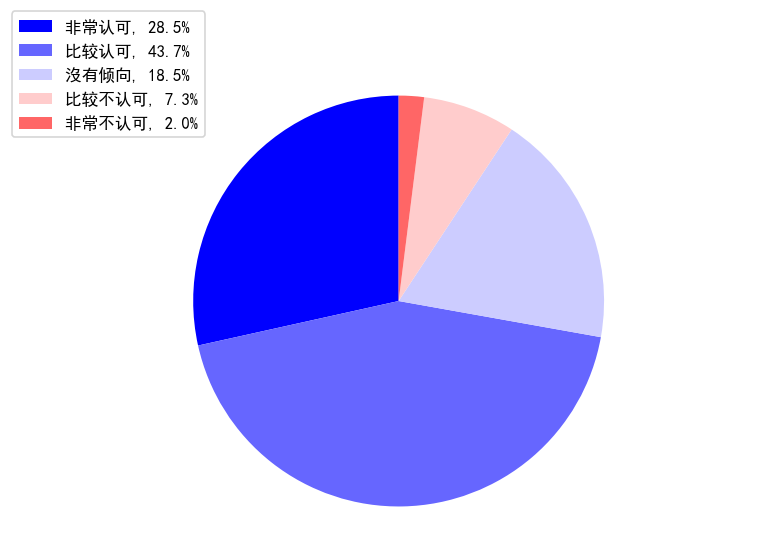

In [24]:
pieChart("對中醫的看法",["非常不认可","比较不认可","沒有倾向","比较认可","非常认可"])

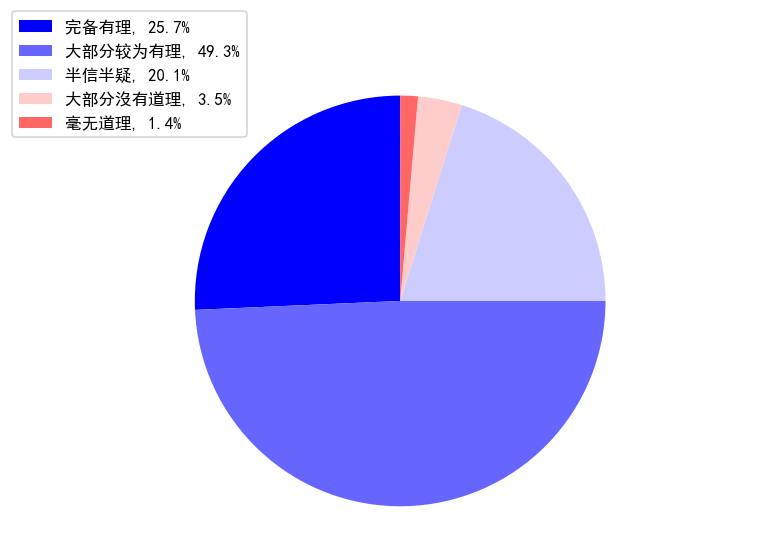

In [25]:
pieChart("對中醫理論的看法",["毫无道理","大部分沒有道理","半信半疑","大部分较为有理","完备有理"])

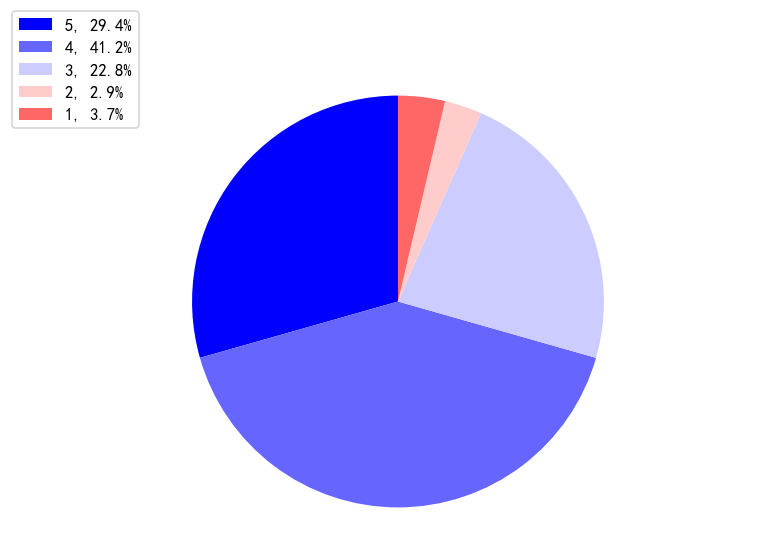

In [26]:
pieChart("對中醫療效的看法",[1,2,3,4,5])

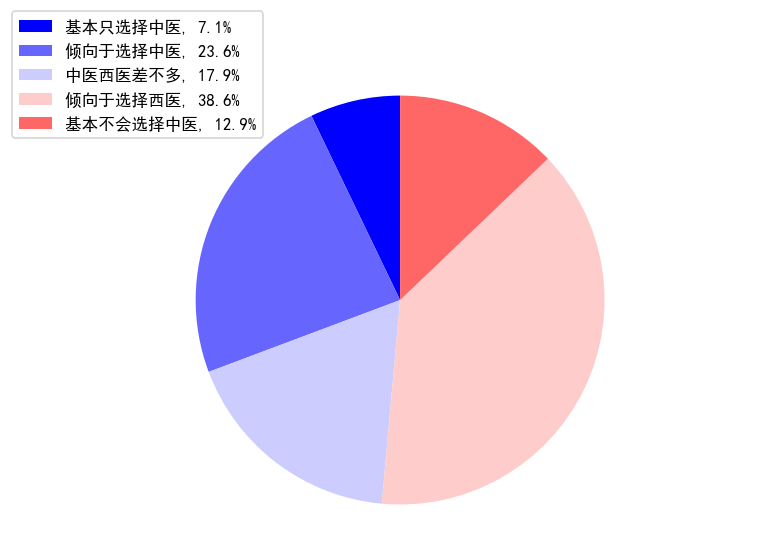

In [27]:
pieChart("是否會選擇中醫",["基本不会选择中医","倾向于选择西医","中医西医差不多","倾向于选择中医","基本只选择中医"])